In [1]:
import sys
import os

#retrieve the absolute path to the 'src' directory

src_patch=os.path.abspath(os.path.join(os.getcwd(), "..", "src"))

#append the path to sys.path to enable module import

sys.path.append(src_patch)

In [2]:
import pandas as pd 
from EDA_functions import cross_dependencies, matrix, unique_values, plot_distributions

In [3]:
#load the dataset into memory

df=pd.read_csv("/Users/gabrielemia/Documents/My Project/data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [4]:
#check nan values

df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
#get info by dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#replace space-only entries in the "Total Charges" column with NaN values

empty_rows=df.loc[df["TotalCharges"]==" "].index
df.loc[empty_rows, "TotalCharges"]=None

In [7]:
#convert the "Total Charges" column to float64

df["TotalCharges"]=df["TotalCharges"].dropna(axis=0).astype("float64")
df["TotalCharges"].dtype

dtype('float64')

In [8]:
#convert the "Senior Citizen" column to object type, as it represents a categorical variable

df["SeniorCitizen"]=df["SeniorCitizen"].astype("str")
df["SeniorCitizen"].dtype

dtype('O')

In [9]:
#check summary statistics of numerical features

df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In [10]:
#retrieve unique values for all discrete features in the dataset

unique_values(df.drop(["customerID", "tenure", "MonthlyCharges", "TotalCharges"], axis=1))

{'gender': array(['Female', 'Male'], dtype=object),
 'SeniorCitizen': array(['0', '1'], dtype=object),
 'Partner': array(['Yes', 'No'], dtype=object),
 'Dependents': array(['No', 'Yes'], dtype=object),
 'PhoneService': array(['No', 'Yes'], dtype=object),
 'MultipleLines': array(['No phone service', 'No', 'Yes'], dtype=object),
 'InternetService': array(['DSL', 'Fiber optic', 'No'], dtype=object),
 'OnlineSecurity': array(['No', 'Yes', 'No internet service'], dtype=object),
 'OnlineBackup': array(['Yes', 'No', 'No internet service'], dtype=object),
 'DeviceProtection': array(['No', 'Yes', 'No internet service'], dtype=object),
 'TechSupport': array(['No', 'Yes', 'No internet service'], dtype=object),
 'StreamingTV': array(['No', 'Yes', 'No internet service'], dtype=object),
 'StreamingMovies': array(['No', 'Yes', 'No internet service'], dtype=object),
 'Contract': array(['Month-to-month', 'One year', 'Two year'], dtype=object),
 'PaperlessBilling': array(['Yes', 'No'], dtype=object),
 '

# <font color="red">Numerical variables </font>

## <font color="green">Correlation analysis </font>

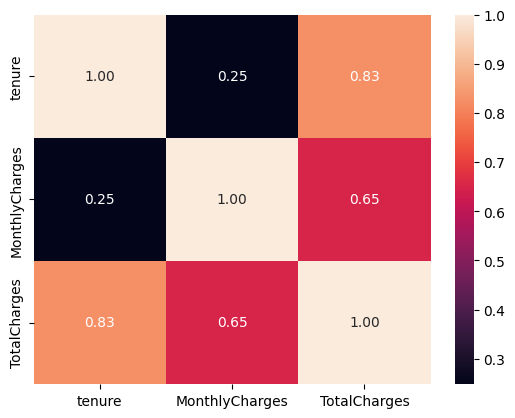

In [11]:
#create a Pearson correlation matrix with heatmap to visualize linear associations between features

matrix(df[["tenure", "MonthlyCharges", "TotalCharges"]], "pearson")

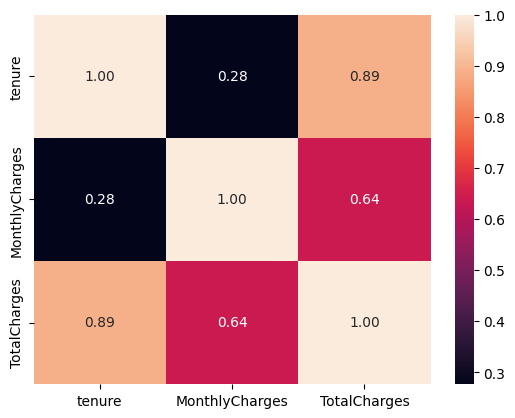

In [12]:
#create a Spearman correlation matrix with heatmap to visualize monotonic associations between features

matrix(df[["tenure", "MonthlyCharges", "TotalCharges"]], "spearman")

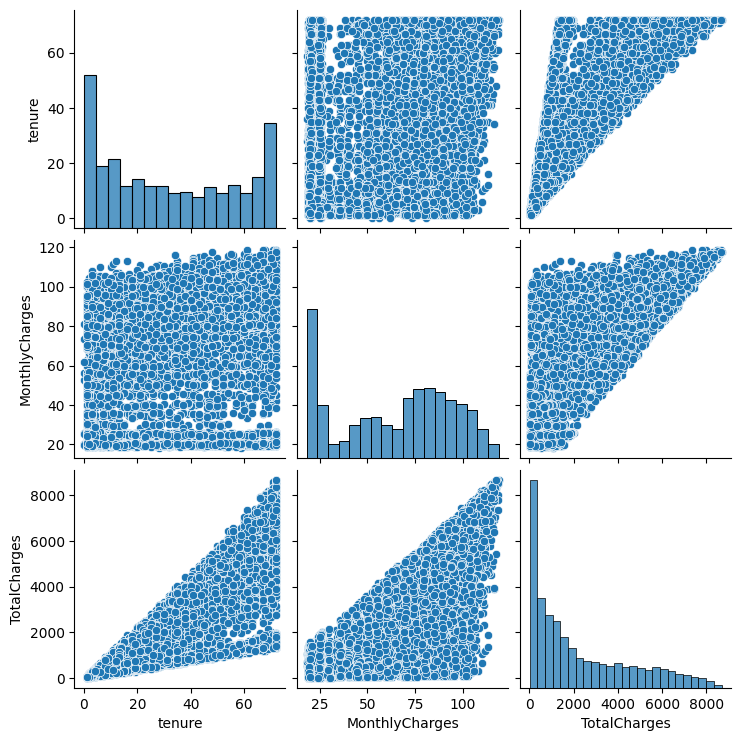

In [13]:
#plot the pairwise relationships of all numerical variables using pairplot

plot_distributions(df=df, plot_type="pairplot")

                  Skewness tenure: 0.24
                  Mean tenure: 32.37
                  Median tenure: 29.0
                  Mode tenure: 1


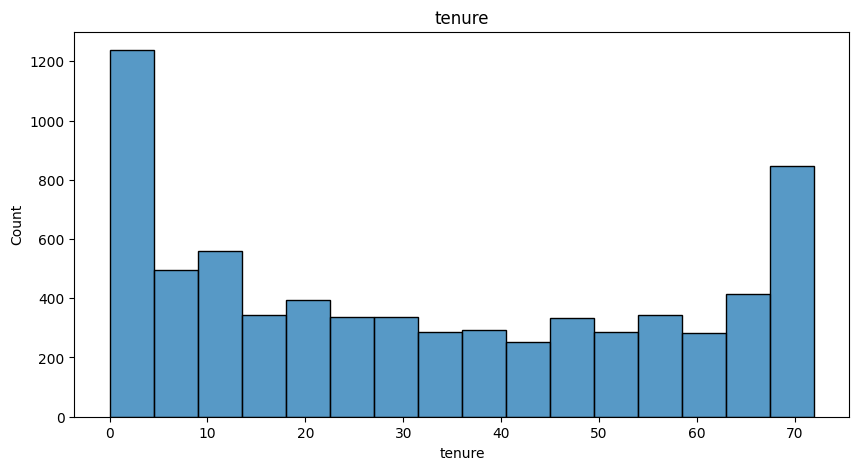

                  Skewness MonthlyCharges: -0.22
                  Mean MonthlyCharges: 64.76
                  Median MonthlyCharges: 70.35
                  Mode MonthlyCharges: 20.05


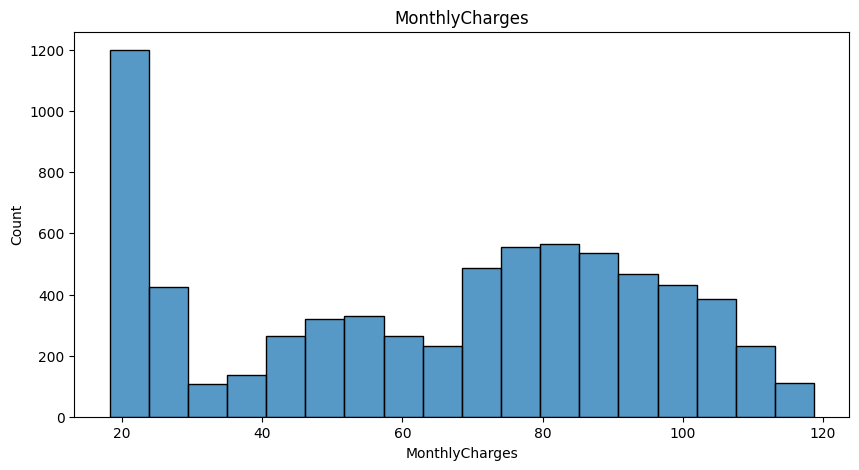

                  Skewness TotalCharges: 0.96
                  Mean TotalCharges: 2283.3
                  Median TotalCharges: 1397.48
                  Mode TotalCharges: 20.2


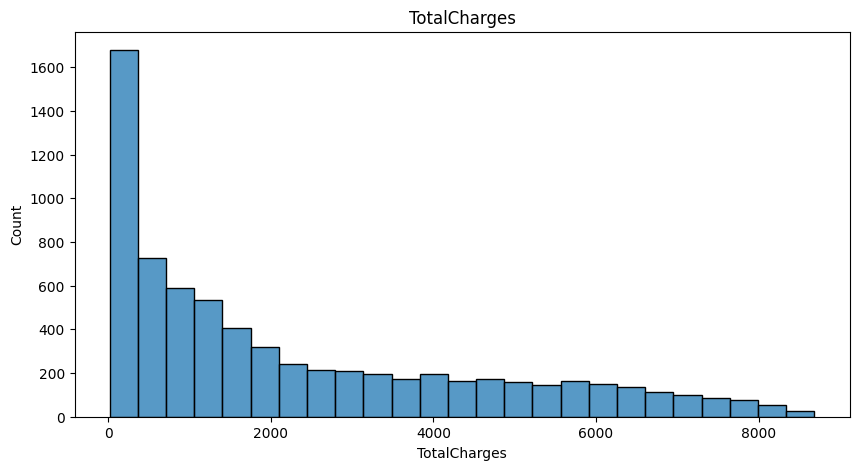

In [14]:
#plot histograms of the distributions and display key summary statistics for each variable

plot_distributions(df, cols=df[["tenure", "MonthlyCharges", "TotalCharges"]])

## <font color="green">Outliers analysis</font>

            Min: 0
            First Quantile: 9.0
            Median: 29.0
            Third Quantile: 55.0
            Max: 72


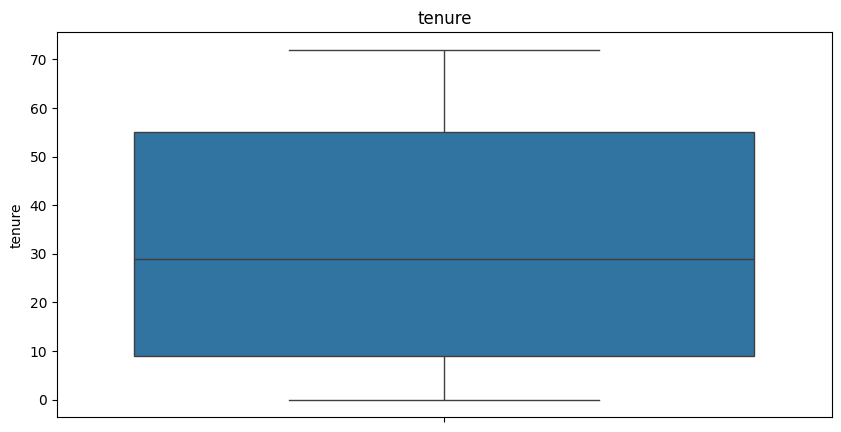

            Min: 18.25
            First Quantile: 35.5
            Median: 70.35
            Third Quantile: 89.85
            Max: 118.75


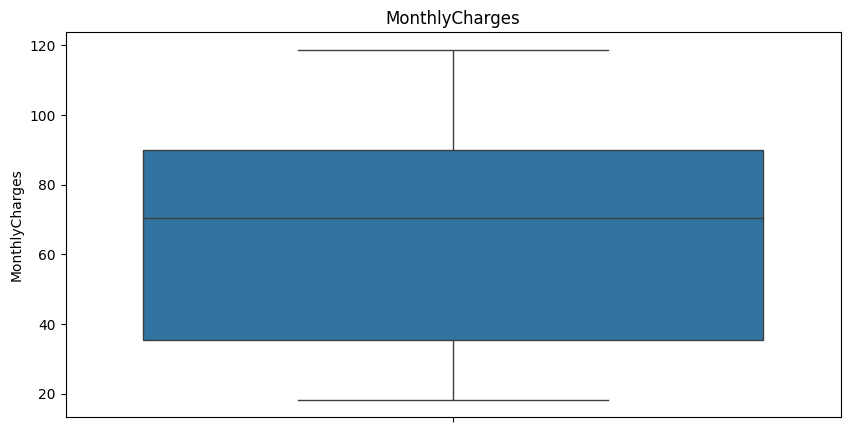

            Min: 18.8
            First Quantile: 401.45
            Median: 1397.48
            Third Quantile: 3794.74
            Max: 8684.8


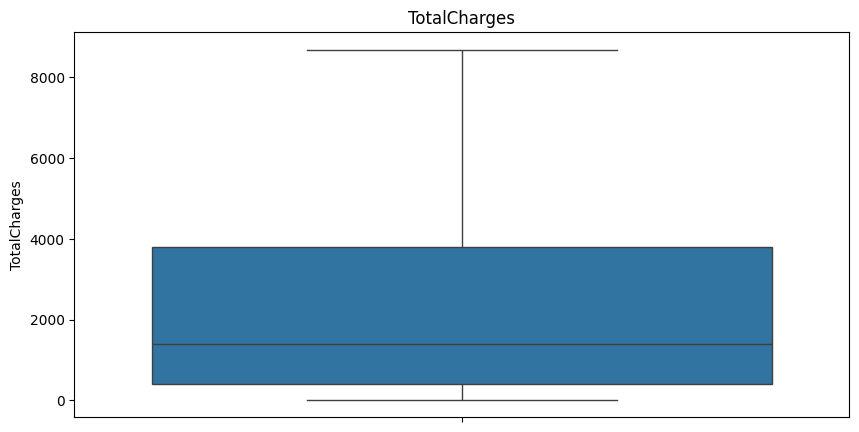

In [15]:
#analyze boxplots to examine distributions and quartile values

plot_distributions(df, cols=df[["tenure", "MonthlyCharges", "TotalCharges"]], plot_type="boxplot")

# <font color="red"> Categorical variables </font>

In [16]:
#visualize the association between the "tenure" variable (treated as categorical) and "Churn"

cross_dependencies(df, cols=df["tenure"], target=df["Churn"], method="one_to_one")

Churn     No   Yes  Totals
tenure                    
0         11     0      11
1        233   380     613
2        115   123     238
3        106    94     200
4         93    83     176
...      ...   ...     ...
69        87     8      95
70       108    11     119
71       164     6     170
72       356     6     362
Totals  5174  1869    7043

[74 rows x 3 columns]

Statistic: 1065.3308567510544
Chi2 p-value: 1.7660172515620113e-139
V-Cramer=0.38892280467743456)
-----


In [17]:
#visualize associations between all non-numerical features and "Churn"

cross_dependencies(df, cols=df.drop(["SeniorCitizen", "tenure", "MonthlyCharges", "Churn"], axis=1), target=df["Churn"], method="many_to_one")

Churn      No   Yes  Totals
Partner                    
No       2441  1200    3641
Yes      2733   669    3402
Totals   5174  1869    7043

Statistic: 0.49793541895353094
Fisher p-value: 6.92015876793339e-37
V-Cramer=0.00840828968113332)
-----
Churn         No   Yes  Totals
Dependents                    
No          3390  1543    4933
Yes         1784   326    2110
Totals      5174  1869    7043

Statistic: 0.4014731653729122
Fisher p-value: 4.829268837490579e-46
V-Cramer=0.007550042857451585)
-----
Churn              No   Yes  Totals
InternetService                    
DSL              1962   459    2421
Fiber optic      1799  1297    3096
No               1413   113    1526
Totals           5174  1869    7043

Statistic: 732.309589667794
Chi2 p-value: 6.451559630001854e-155
V-Cramer=0.32245455521230887)
-----
Churn                  No   Yes  Totals
OnlineSecurity                         
No                   2037  1461    3498
No internet service  1413   113    1526
Yes             

In [18]:
#visualize associations between all non-numerical features and "Contract"

cross_dependencies(df, cols=df.drop(["SeniorCitizen", "tenure", "MonthlyCharges", "Contract"], axis=1), target=df["Contract"], method="many_to_one")

Contract  Month-to-month  One year  Two year  Totals
Partner                                             
No                  2495       643       503    3641
Yes                 1380       830      1192    3402
Totals              3875      1473      1695    7043

Statistic: 617.2440921596583
Chi2 p-value: 4.4441292473963605e-130
V-Cramer=0.2960394759374369)
-----
Contract    Month-to-month  One year  Two year  Totals
Dependents                                            
No                    3086       942       905    4933
Yes                    789       531       790    2110
Totals                3875      1473      1695    7043

Statistic: 420.0418172723388
Chi2 p-value: 1.369963604759517e-87
V-Cramer=0.24421223608441336)
-----
Contract          Month-to-month  One year  Two year  Totals
MultipleLines                                               
No                          2017       712       661    3390
No phone service             376       145       161     682
Yes        

# <font color="red"> Conclusions

Il 55% dei clienti (3875) ha sottoscritto contratti mensili, mentre la parte restante ha scelto da subito un impegno maggiore optando per soluzioni annuali o biennali. Tra questi, è possibile notare che all'aumentare della longevità del contratto cresce anche il numero di clienti che acquistano servizi accessori, come il Tech Support, l'Online Security, l'Online Backup o la Device Protection. Una correlazione molto forte tra la durata del contratto e la spesa mensile, significa che più tempo un cliente rimane con l'azienda, maggiore sarà la probabilità che acquisti ulteriori servizi, incrementando la spesa.</br>
D'altra parte, i clienti che sottoscrivono contratti mensili, tendono a rimanere fedeli al piano base, infatti il 60%-70% di questi non sottoscrive servizi aggiuntivi. </br></br>
<font style="strong">Come influenzano la tipologia contrattuale e l'adesione ai servizi la probabilità di disdetta?</font><br></br>
Contratti:<ul>
<li>Contratti Month-to-month: su 3875 clienti con contratto mensile, il 43% abbandona l'abbonamento. È interessante notare che per i clienti che rimangono solo per un mese, la percentuale di abbandono è del 61%. Ciò evidenzia che i contratti brevi hanno maggiore probabilità di essere disdetti, con un'alta concentarzione di clienti che non riescono a percepire il valore continuativo del servizio;</li>
<li>One Year: per chi sottoscrive un contratto annuale la percentuale di abbandono è più bassa, all'incirca l'11%. È comprensibile, in quanto scegliere un contratto annuale implica maggiore impegno. Ridurre le disdette in questa categoria è fondamentale, in quanto l'obiettivo dovrebbe essere quello di fidelizzare questi clienti, di modo che rinnovino il contratto ;</li>
<li>Two Year: per i clienti che si impegnano con contratto biennale la percentuale di abbandono è del 3% all'incirca. È bassa per fortuna. Questo potrebbe evidenziare una maggiore soddisfazione e un minor numero di opzioni per abbandonare.</li></ul></br>
Servizio internet: <ul>
<li>il tasso di abbandono per chi possiede la DSL è molto basso: su 2421 clienti che la possiedono solo 459, ovvero circa il 19%, abbandona. Questo potrebbe indicare delle buone prestazioni relative alla qualità del servizio;</li>
<li>per quanto riguarda la fibra ottica la situazione è diversa: su 3096 clienti che sottoscrivono la fibra ottica il tasso di abbandono è molto più alto, all'incirca il 42%. Questo potrebbe suggerire che nonostante un prezzo maggiore, i clienti potrebbero non percepire una grande differenza con la DSL. Sarebbe interessante capire se i clienti che disdicono la fibra ottica, abbiano precedentemente provato la DSL;</li></ul></br>

Sicurezza Online: <ul>
<li>per i clienti che non hanno sottoscritto l'online security la situazione è un po' diversa, in quanto la percentuale di abbandono è alta, all'incirca il 42%. Quindi quasi la metà dei clienti che non hanno l'online security disdicono l'abbonamento. Questo potrebbe indicare una sensazione di percezione di insicurezza o dell'assenza di una qualità adeguata nel servizio;</li>
<li>relativamente ai sottoscrittori di una online security, nonostante nel complesso siano molti meno (2019 sottoscrittori a confronto di 3498 non sottoscrittori) la percentuale di abbandono è più bassa, tocca il 14%. 
Questa situazione potrebbe significare che il servizio di online security erogato potrebbe essere di buona qualità, in quanto chi lo sottoscrive difficilmente si tira indietro. Questo suggerisce che la sicurezza online potrebbe essere percepita come un valore aggiunto contribuendo alla fidelizzazione. </li></ul></br>

Supporto Tech: </br></br>
La situazione in merito al supporto Tech è molto simile a quella riscontrata relativamente all'online security: per i clienti che non usufruiscono del supporto Tech c'è un'alta percentuale di abbandono, in questo caso il 42% circa. Quasi la metà delle persone decide di abbandonare la compagnia.
Per chi invece sottoscrive questo servizio la percentuale di abbandono è molto più bassa, all'incirca il 15%. </br></br></br>
È importante notare che, sebbene le analisi evidenzino delle correlazioni tra alcune variabili, come quelle tra tipo di contratto e tasso di abbandono, gli indici di correlazione (V di Cramer) sono molto bassi, inferiori a 0.5, indicando che, nonostante ci sia una correlazione, questa è modesta. </br>
Questi rusultati evidenziano che ci sono altri fattori da considerare, che potrebbero influenzare maggiormente il tasso di abbandono. Inoltre, lo sbilanciamento intrinseco, data la natura del dataset, tra le classi "Churn" e "Non-Churn" complica ulterioremente l'analisi rendendo necessario un trattamento specifico in fase di preprocessing dei dati.


# <font color="red">Export the DataFrame</font>

In [20]:
df.to_csv("/Users/gabrielemia/Documents/My Project/data/preprocessing_df.csv")